<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Problem Statement:-

This Uber datset. The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation.

Data Cleaning and Preparation - Hints

Identify the data quality issues and clean the data so that you can use it for analysis. Ensure that the dates and time are in the proper format. Derive new variables which will be useful for analysis.




<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Data Definition:-



There are six attributes associated with each request made by a customer:



| Column Name|Description|
|-------------------|------------|
|Request id|A unique identifier of the request|
|Time of request|The date and time at which the customer made the trip request|
| Drop-off time|The drop-off date and time, in case the trip was completed| 
|Pick-up point|The point from which the request was made|
|Driver id|The unique identification number of the driver.|
|Status of the request|The final status of the trip, that can be either completed, cancelled by the driver or no cars available.|


### * Students need to solve the below questions

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">1. Data analysis

##### A. load the data into dataframe and print the first five rows

##### B. Print the dataframe information to check data type and null values in each column.

##### C. Fetch the first row from the 4th column of the data set.

##### D. Fetch the first, second and third columns of the  data frame

##### E. Fetch the first, second, eighth and the 706th rows of the 1st, 3rd and the 6th columns of the data frame

##### F. Create a small dataframe to identify the number of drivers and average trip they complete daily.

##### G. On average how many request each driver gets?


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">2. Depth  Data Analysis

##### A. Format the date on `request timestamp` and `drop timestamp` columns

##### B. Create a derived metrics from `timestamp` columns and print the top few rows out of it.

   Step1: Using `Request timestamp` columns create new columns called [Request Date,Request Time,Request Weekday,Request Hour] 
    
   Step2: Using  `Drop timestamp` columns create new columns called [Drop Date,Drop Time] 

##### C. Group the data by `status` and count the number of `request ids` for each `status type`.

##### D. Find the range between `Request Date`.

##### E. Print all unique dates

##### F . Group by `driver id` and `status type` and print the top 10 rows.

##### G. Filter the dataframe for which trip is either cancelled or no cab was available.

##### H. Filter the  dataframe for which trip was completed. Group by status type to check the count.

##### I. Group by `status` to check total count of trip completed and cancelled?

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3. Visualisation

##### A. Display the distribution plot using the column Request Hour

##### B. Display the box plot using the column Request Hour and Pickup point

##### C. Display the heatmap

##### D.Plot suitable graph for `Status` and `Pickup point`. Write your observation.

##### E. Plot suitable graph from the data to show demand supply gap

  Step1: The graph needs to show

  1st line for `Demand` = groupby['Request Hour']).count()['Request id']

  2nd line for `Supply` = groupby['Status']=="Trip Completed"]['Request Hour']).count()['Request id']

  3rd line for `gap` = groupby['Request Hour']).count()['Request id'] - ['Status']=="Trip Completed"].groupby['Status']=="Trip Completed"]['Request Hour']).count()['Request id'])

   title = "Demand Supply Gap"
                                
##### F. Plot the suitable graph from the data to show hourly distribution of request.

##### G. Plot the suitable graph from the data to get the count of status for `airport to city` and `city to airport` trips using subplots.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Import libraries 

In [2]:
# importing libraries
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">1. Basic Data Analysis

##### A. load the data into dataframe and print the first five rows

##### B. Print the dataframe information to check data type and null values in each column.

##### C. Fetch the first row from the 4th column of the data set.

##### D. Fetch the first, second and third columns of the  data frame

##### E. Fetch the first, second, eighth and the 706th rows of the 1st, 3rd and the 6th columns of the data frame

##### F. Create a small dataframe to identify the number of drivers and average trip they complete daily.

##### G. On average how many request each driver gets?


### A. load the data into dataframe and print the first five rows

In [4]:
uber_data = pd.read_csv("Uber+Request+Data.csv")
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [24]:
uber_data['Driver id'].nunique()

300

### B. Print the dataframe information to check data type and null values in each column

In [4]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


### C. Fetch the first row from the 4th column of the data set.

In [5]:
uber_data.iloc[0,3]

'Trip Completed'

### D. Fetch the first, second and third columns of the data frame.

In [6]:
uber_data.iloc[:,[0,1,2]]

,Request id,Pickup point,Driver id
0,619,Airport,1.0
1,867,Airport,1.0
2,1807,City,1.0
3,2532,Airport,1.0
4,3112,City,1.0
...,...,...,...
6740,6745,City,NaN
6741,6752,Airport,NaN
6742,6751,City,NaN
6743,6754,City,NaN


### E. Fetch the first, second, eighth and the 706th rows of the 1st, 3rd and the 6th columns of the data frame.

In [7]:
uber_data.iloc[[0,2,8,706],[0,2,5]]

,Request id,Driver id,Drop timestamp
0,619,1.0,11/7/2016 13:00
2,1807,1.0,12/7/2016 9:58
8,6248,1.0,15-07-2016 18:50:51
706,285,74.0,11/7/2016 7:40


### F. Create a small dataframe to identify the number of drivers and average trip they complete daily.

In [8]:
demand_vs_supply = pd.DataFrame({'Total No. of Drivers':[uber_data['Driver id'].nunique()], 
                                 'Total Demand Per Day':[uber_data['Request id'].nunique()/5],
                                'Trip_Completed_Count_Per_Day':uber_data[(uber_data['Status']=='Trip Completed')].shape[0]/5})
demand_vs_supply

,Total No. of Drivers,Total Demand Per Day,Trip_Completed_Count_Per_Day
0,300,1349.0,566.2


### G. On average how many request each driver gets?

In [9]:

demand_vs_supply['Total Demand Per Day']/demand_vs_supply['Total No. of Drivers']

0    4.496667
dtype: float64

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">2. Depth  Data Analysis

##### A. Format the date on `request timestamp` and `drop timestamp` columns

##### B. Create a derived metrics from `timestamp` columns and print the top few rows out of it.

   Step1: Using `Request timestamp` columns create new columns called [Request Date,Request Time,Request Weekday,Request Hour] 
    
   Step2: Using  `Drop timestamp` columns create new columns called [Drop Date,Drop Time] 

##### C. Group the data by `status` and count the number of `request ids` for each `status type`.

##### D. Find the range between `Request Date`.

##### E. Print all unique dates

##### F . Group by `driver id` and `status type` and print the top 10 rows.

##### G. Filter the dataframe for which trip is either cancelled or no cab was available.

##### H. Filter the  dataframe for which trip was completed. Group by status type to check the count.

##### I. Group by `status` to check total count of trip completed and cancelled?

### A. Format the date on request timestamp and drop timestamp columns

In [18]:
uber_data["Request timestamp"] = pd.to_datetime(uber_data["Request timestamp"], dayfirst=True)
uber_data["Drop timestamp"] = pd.to_datetime(uber_data["Drop timestamp"], dayfirst=True)

In [19]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### B. Create a derived metrics from timestamp columns and print the top few rows out of it.

Step1: Using Request timestamp columns create new columns called [Request Date,Request Time,Request Weekday,Request Hour]

Step2: Using Drop timestamp columns create new columns called [Drop Date,Drop Time]

In [12]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [23]:
uber_data['Request Weekday'] = uber_data['Request timestamp'].apply(lambda x : dt.datetime.strftime(x, '%A'))
uber_data['Request timestamp'].apply(lambda x: x.hour)

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [11]:
uber_data['Request Date'] = uber_data["Request timestamp"].dt.date
uber_data['Request Time'] = uber_data["Request timestamp"].dt.time
uber_data['Drop Date'] = uber_data["Drop timestamp"].dt.date
uber_data['Drop Time'] = uber_data["Drop timestamp"].dt.time
uber_data['Request Weekday'] = uber_data['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
uber_data['Request Hour'] = uber_data['Request timestamp'].apply(lambda x: x.hour)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


### C. Group the data by status and count the number of request ids for each status type

In [12]:
uber_data.groupby(uber_data.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,0,0,2650,2650
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


### D. Find the range between `Request Date`.

In [13]:
print("Minimum Date: ", min(uber_data['Request Date']))
print("Maximum Date: ", max(uber_data['Request Date']))

Minimum Date:  2016-07-11
Maximum Date:  2016-07-15


### E. Print all unique dates

In [14]:
print(uber_data['Request Date'].unique())

[datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


### F . Group by `driver id` and `status type` and print the top 10 rows.

In [15]:
uber_data_groupby_status_and_driverId = uber_data.groupby(["Driver id","Status"]).count()
uber_data_groupby_status_and_driverId.head(10)

Request id  Pickup point  Request timestamp  \
Driver id Status                                                        
1.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
2.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
3.0       Cancelled                4             4                  4   
          Trip Completed          10            10                 10   
4.0       Cancelled                5             5                  5   
          Trip Completed          10            10                 10   
5.0       Cancelled                2             2                  2   
          Trip Completed          11            11                 11   

                          Drop timestamp  Request Date  Request Time  \
Driver id Status                                                       
1.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
2.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
3.0       Cancelled                    0             4             4   
          Trip Completed              10            10            10   
4.0       Cancelled                    0             5             5   
          Trip Completed              10            10            10   
5.0       Cancelled                    0             2             2   
          Trip Completed              11            11            11   

                          Drop Date  Drop Time  Request Weekday  Request Hour  
Driver id Status                                                               
1.0       Cancelled               0          0                4             4  
          Trip Completed          9          9                9             9  
2.0       Cancelled               0          0                4             4  
          Trip Completed          9          9                9             9  
3.0       Cancelled               0          0                4             4  
          Trip Completed         10         10               10            10  
4.0       Cancelled               0          0                5             5  
          Trip Completed         10         10               10            10  
5.0       Cancelled               0          0                2             2  
          Trip Completed         11         11               11            11

### G. Filter the dataframe for which trip is either cancelled or no cab was available.

In [16]:
uber_data_with_null_drop_timestamp = uber_data[uber_data["Drop timestamp"].isnull()]
uber_data_with_null_drop_timestamp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,NaT,NaT,Wednesday,6
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,NaT,NaT,Thursday,17
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,NaT,NaT,Thursday,20
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,NaT,NaT,Friday,10
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,NaT,NaT,Tuesday,19


### H. Filter the  dataframe for which trip was completed. Group by status type to check the count.


In [17]:
uber_data_with_drop_timestamp = uber_data[~(uber_data["Drop timestamp"].isnull())]
uber_data_with_drop_timestamp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


In [17]:
# grouping by status type to check count
uber_data_with_drop_timestamp.groupby(uber_data_with_drop_timestamp.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [ ]:
u

### I. Group by `status` to check total count of trip completed and cancelled?

In [18]:
uber_data_with_driver_id = uber_data[~uber_data["Driver id"].isnull()]

In [19]:
uber_data_with_driver_id.groupby(uber_data_with_driver_id.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [20]:
print("Number of rows with driver id but null Drop timestamp:", uber_data_with_driver_id["Drop timestamp"].isnull().sum())

Number of rows with driver id but null Drop timestamp: 1264


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3. Visualisation

##### A. Display the distribution plot using the column Request Hour

##### B. Display the box plot using the column Request Hour and Pickup point

##### C. Display the heatmap

##### D.Plot suitable graph for `Status` and `Pickup point`. Write your observation.

##### E. Plot suitable graph from the data to show demand supply gap

  Step1: The graph needs to show

  1st line for `Demand` = groupby['Request Hour']).count()['Request id']

  2nd line for `Supply` = groupby['Status']=="Trip Completed"]['Request Hour']).count()['Request id']

  3rd line for `gap` = groupby['Request Hour']).count()['Request id'] - ['Status']=="Trip Completed"].groupby['Status']=="Trip Completed"]['Request Hour']).count()['Request id'])

   title = "Demand Supply Gap"
                                
##### F. Plot the suitable graph from the data to show hourly distribution of request.

##### G. Plot the suitable graph from the data to get the count of status for `airport to city` and `city to airport` trips using subplots.


### A. Display the distribution plot using the column Request Hour

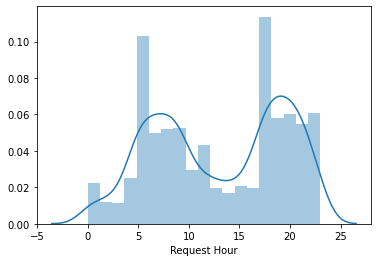

In [21]:
sns.distplot(uber_data['Request Hour'])
plt.show()

### B. Display the box plot using the column Request Hour and Pickup point

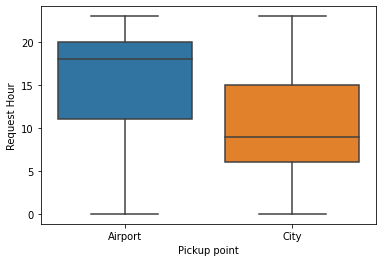

In [22]:
sns.boxplot(x='Pickup point', y='Request Hour',data=uber_data)
plt.show()

### C. Display the heatmap.

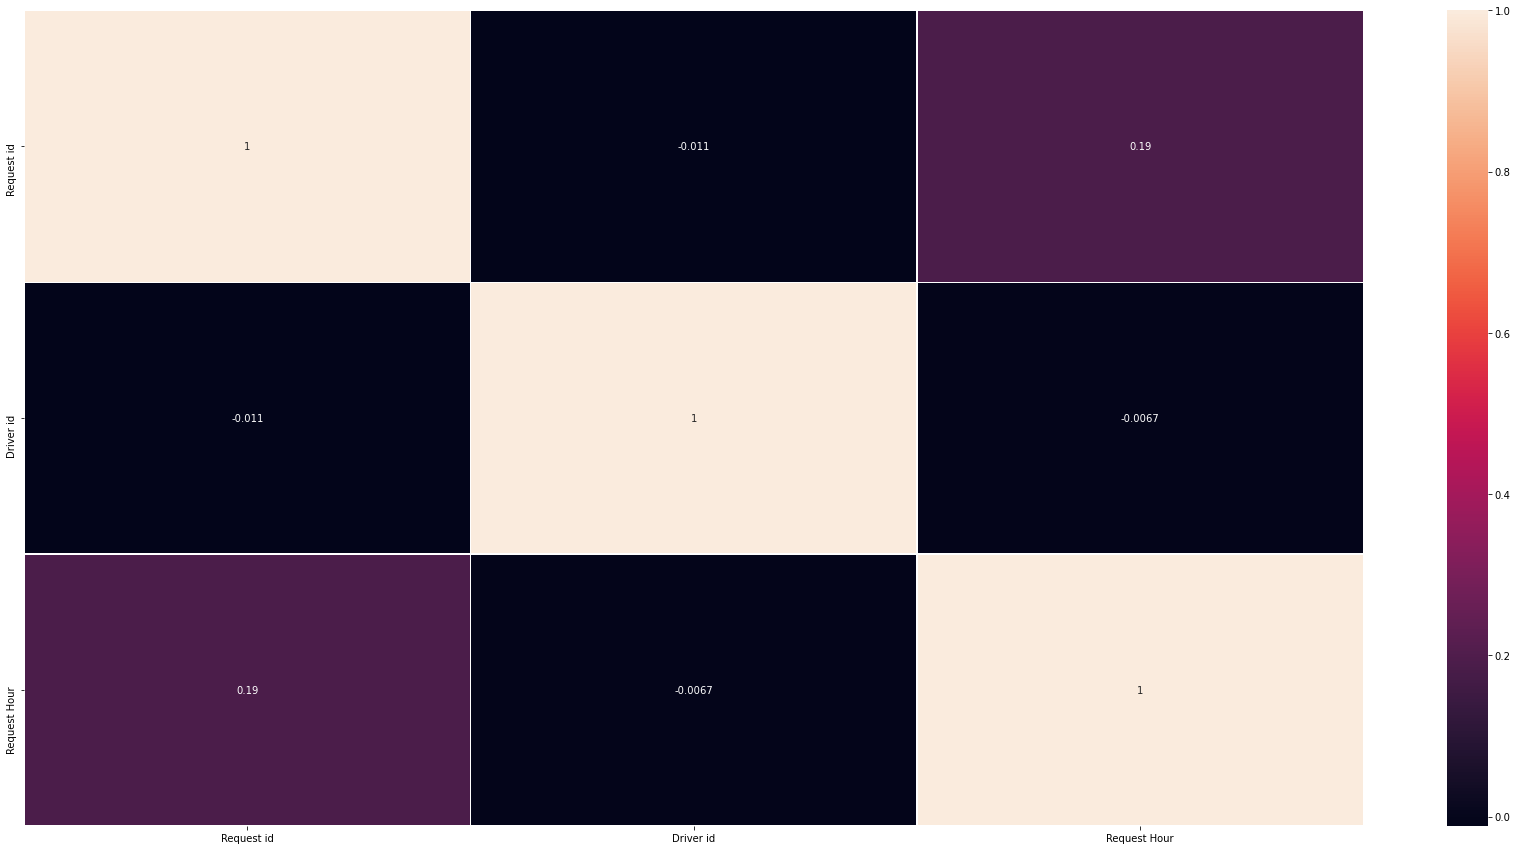

In [23]:
plt.figure(figsize=(30,15))
sns.heatmap(uber_data.corr(),linewidths=0.1,vmax=1.0,annot=True)
plt.show()

### D.Plot suitable graph for `Status` and `Pickup point`. Write your observation.

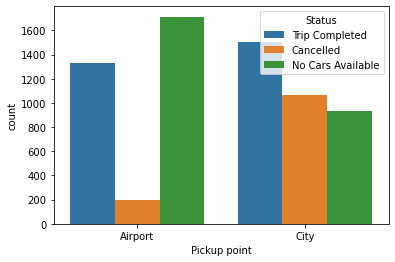

In [24]:
sns.countplot(x=uber_data['Pickup point'],hue =uber_data['Status'] ,data = uber_data)

* There are more No cars available from Airport to City.
* There are more cars Cancelled from City to Airport.

### E. Plot the suitable graph from the data to check if cancellations are more towards  `airport to city` and `city to airport` trips using subplots.


In [25]:
uber_data_city = uber_data[uber_data['Pickup point']=="City"]
uber_data_airport = uber_data[uber_data['Pickup point']=="Airport"]

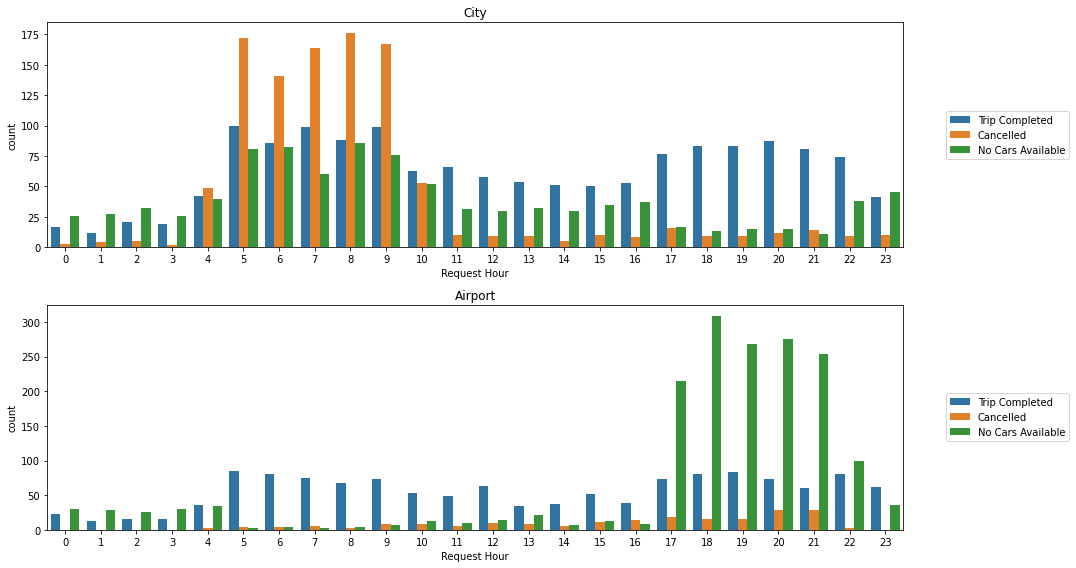

In [26]:
f = plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("City")
sns.countplot(x='Request Hour',hue='Status',data=uber_data_city)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport")
sns.countplot(x='Request Hour',hue='Status',data=uber_data_airport)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()